# **Dataset Loading and Libraries Importing**

In [147]:
# Libraries Importing
import pandas as pd

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, mutual_info_regression

from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [148]:
# Display all columns and rows of the dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [149]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [180]:
# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/stout/loans_full_schema.csv")

# **Part A: Analysis of the Dataset and Visualizations**

## **Quick Look at the Dataset**

The following dataset has **10.000 observiations** with **55 variables** and it represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals.

In [181]:
# Size of dataset
df.shape 

(10000, 55)

In [182]:
# Show 5 random rows of dataset
df.sample(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
3821,NaN,NaN,TX,OWN,48000.0,Not Verified,22.05,NaN,NaN,NaN,2,4.0,1991,2,27,17,56610,24179,0,0,NaN,0,0,1,3,2.0,17,0.0,0,5,24200,24,16,8,1,85.2,0,0,debt_consolidation,individual,12000,36,13.58,407.69,C,C2,Mar-2018,Current,fractional,Cash,11175.27,1214.020000,824.73,389.29,0.0
5616,owner,10.0,TX,MORTGAGE,50000.0,Not Verified,10.06,NaN,NaN,NaN,3,13.0,1995,0,23,10,154807,13525,0,1,39.0,0,0,0,0,14.0,10,0.0,0,7,30000,13,8,7,3,72.7,1,0,credit_card,individual,12000,36,9.43,384.01,B,B1,Mar-2018,Current,whole,Cash,11124.02,1139.460000,875.98,263.48,0.0
4373,NaN,NaN,MN,RENT,10548.0,Source Verified,25.60,NaN,NaN,NaN,0,52.0,2010,3,19,12,27600,4030,0,0,NaN,0,0,1,8,6.0,12,0.0,0,4,15600,17,11,4,0,92.9,0,0,debt_consolidation,individual,3000,36,9.93,96.71,B,B2,Jan-2018,Current,whole,Cash,2634.57,476.930000,365.43,111.50,0.0
3089,underwriter,9.0,KY,OWN,85000.0,Verified,23.35,NaN,NaN,NaN,0,NaN,1989,4,68,36,170053,88797,0,0,NaN,0,0,10,13,2.0,36,0.0,0,6,43800,32,26,10,0,100.0,0,0,other,individual,14000,60,18.45,358.95,D,D2,Mar-2018,Current,whole,Cash,13562.24,1048.150000,437.76,610.39,0.0
4919,material coordinator,10.0,CA,RENT,65000.0,Verified,29.51,NaN,NaN,NaN,1,17.0,2000,0,19,16,71746,60991,0,0,NaN,0,0,9,2,13.0,16,0.0,0,1,4000,9,7,4,0,94.7,0,0,debt_consolidation,individual,4200,36,14.07,143.69,C,C3,Mar-2018,Fully Paid,whole,Cash,0.00,4273.242992,4200.00,73.24,0.0


In [183]:
# Quick look in the columns - empty values - datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

## **Analysis of Categorical and Numerical Variables**

#### **A. Categorical Variables**

We have 13 **categorical** variables: 
* `emp_title`: job title of the applicant. (manager, owner, teacher etc)
* `state`: two-letter state code. (CA, TX, NY etc)
* `homeownership`: the ownership status of the applicant's residence. (MORTGAGE, RENT, OWN)
* `verified_income`: type of verification of the applicant's income. (Source Verified, Not Verified, Verified)
* `verification_income_joint`: type of verification of the joint income (Source Verified, Not Verified, Verified)
* `loan_purpose`: category for the purpose of the loan. (debt consolidation, credit card, home improvement etc)
* `application_type`: type of application (individual, joint)
* `grade`: grade associated with the loan. The grade reflects the creditworthiness and the risk associated with the loan. In grading system "A-D", "A" referes to the highest quality and "D" to the lowest. (A, B, C, D, E, F, G)
* `sub_grade`: detailed grade associated with the loan (A1, A2, B1, B2, etc)
* `issue_month`: month the loan was issued (Jan-2018, Feb-2018, Mar-2018)
* `loan_status`: status of the loan (Current, Fully Paid, In Grace Period, Late (31-120 days), Late (16-30 days))
* `initial_listing_status`: initial listing status of the loan (whole, fractional)
* `disbursement_method`: dispersement method of the loan. (Cash, DirectPay)

In [184]:
# Categorical values
df.describe(include='object')

,emp_title,state,homeownership,verified_income,verification_income_joint,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
count,9167,10000,10000,10000,1455,10000,10000,10000,10000,10000,10000,10000,10000
unique,4741,50,3,3,3,12,2,7,32,3,6,2,2
top,manager,CA,MORTGAGE,Source Verified,Not Verified,debt_consolidation,individual,B,B1,Mar-2018,Current,whole,Cash
freq,218,1330,4789,4116,611,5144,8505,3037,647,3617,9375,8206,9284


#### **B. Numerical Variables**

We have 42 **numerical** variables: 
* `emp_length`: Number of years in the job, rounded down. 
* `annual_income`: The annual income of the applicant.
* `debt_to_income`: Debt-to-income ratio.  
* `annual_income_joint`: if this is a joint application, then the annual income of the two parties applying.
* `debt_to_income_joint`: Debt-to-income ratio for the two parties.
* `delinq_2y`: Delinquencies on lines of credit in the last 2 years. 
* `months_since_last_delinq`: Months since the last delinquency.
* `earliest_credit_line`: Year of the applicant's earliest line of credit. 
* `inquiries_last_12m`: Inquiries into the applicant's credit during the last 12 months. 
* `total_credit_lines`: Total number of credit lines in this applicant's credit history. 
* `open_credit_lines`: Number of currently open lines of credit. 
* `total_credit_limit`: Total available credit, e.g. if only credit cards, then the total of all the credit limits. This excludes a mortgage.
* `total_credit_utilized`: Total credit balance, excluding a mortgage.
* `num_collections_last_12m`: Number of collections in the last 12 months. This excludes medical collections. 
* `num_historical_failed_to_pay`: The number of derogatory public records, which roughly means the number of times the applicant failed to pay.
* `months_since_90d_late`: Months since the last time the applicant was 90 days late on a payment.
* `current_accounts_delinq`: Number of accounts where the applicant is currently delinquent. 
* `total_collection_amount_ever`: The total amount that the applicant has had against them in collections. 
* `current_installment_accounts`: Number of installment accounts, which are (roughly) accounts with a fixed payment amount and period. A typical example might be a 36-month car loan. 
* `accounts_opened_24m`: Number of new lines of credit opened in the last 24 months
* `months_since_last_credit_inquiry`:  Number of months since the last credit inquiry on this applicant. 
* `num_satisfactory_accounts`: Number of satisfactory accounts. 
* `num_accounts_120d_past_due`: Number of current accounts that are 120 days past due. 
* `num_accounts_30d_past_due`: Number of current accounts that are 30 days past due. 
* `num_active_debit_accounts`: Number of currently active bank cards. 
* `total_debit_limit`: Total of all bank card limits.
* `num_total_cc_accounts`: Total number of credit card accounts in the applicant's history. 
* `num_open_cc_accounts`: Total number of currently open credit card accounts.
* `num_cc_carrying_balance`: Number of credit cards that are carrying a balance.
* `num_mort_accounts`: Number of mortgage accounts.
* `account_never_delinq_percent`: Percent of all lines of credit where the applicant was never delinquent.
* `tax_liens`: a numeric vector 
* `public_record_bankrupt`: Number of bankruptcies listed in the public record for this applicant. 
* `loan_amount`: The amount of the loan the applicant received. 
* `term`: The number of months of the loan the applicant received.
* `interest_rate`: Interest rate of the loan the applicant received.
* `installment`: Monthly payment for the loan the applicant received. 
* `balance`: Current balance on the loan. 
* `paid_total`: Total that has been paid on the loan by the applicant.
* `paid_principal`: The difference between the original loan amount and the current balance on the loan.
* `paid_interest`: The amount of interest paid so far by the applicant.
* `paid_late_fees`: Late fees paid by the applicant. 


In [185]:
# Numerical values
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

## **Null Values Handling**

In [186]:
# Check if there are any empty cells in the dataset
df.isnull().values.any()

True

In [187]:
def plot_null_values(df):
  if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.plot(kind = "barh")
    plt.show()
  else:
    print('No NAs found')
  return

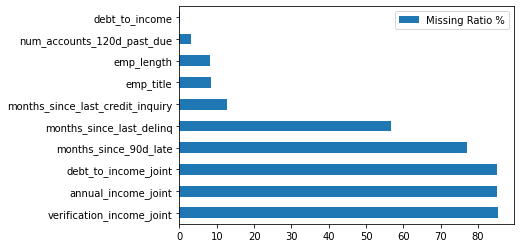

In [188]:
plot_null_values(df)

Null values add bias into the analysis if they are not handled properly and also can affect the performance of a machine learning model. Many machine learning algorithms cannot handle null values and will fail or produce inaccurate results. Removing null values can help ensure that the machine learning model is trained on a clean, consistent dataset. 

In [189]:
for column in df.columns:
  if df[column].isna().sum() != 0 :
    missing = df[column].isna().sum()
    portion = (missing / df.shape[0]) * 100
    print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '833' ==> '8.330%'
'emp_length': number of missing values '817' ==> '8.170%'
'debt_to_income': number of missing values '24' ==> '0.240%'
'annual_income_joint': number of missing values '8505' ==> '85.050%'
'verification_income_joint': number of missing values '8545' ==> '85.450%'
'debt_to_income_joint': number of missing values '8505' ==> '85.050%'
'months_since_last_delinq': number of missing values '5658' ==> '56.580%'
'months_since_90d_late': number of missing values '7715' ==> '77.150%'
'months_since_last_credit_inquiry': number of missing values '1271' ==> '12.710%'
'num_accounts_120d_past_due': number of missing values '318' ==> '3.180%'


* `emp_title` : 

In [190]:
df.emp_title.nunique()

4741

Realistically there are **too many unique** job titles to try to convert this to a dummy variable feature. We will remove the `emp_title` column.

In [191]:
df.drop(columns=['emp_title'], inplace=True)

* `emp_length` : 

In [192]:
df.emp_length.unique()

array([ 3., 10.,  1., nan,  2.,  5.,  7.,  4.,  9.,  0.,  6.,  8.])

In [193]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

3.0 years in this position:
Current               0.945476
Fully Paid            0.040603
Late (31-120 days)    0.008121
Late (16-30 days)     0.004640
In Grace Period       0.001160
Name: loan_status, dtype: float64
10.0 years in this position:
Current               0.935774
Fully Paid            0.047119
In Grace Period       0.007803
Late (31-120 days)    0.005402
Late (16-30 days)     0.003601
Charged Off           0.000300
Name: loan_status, dtype: float64
1.0 years in this position:
Current               0.921168
Fully Paid            0.058394
Late (31-120 days)    0.008759
In Grace Period       0.007299
Late (16-30 days)     0.002920
Charged Off           0.001460
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)
2.0 years in this position:
Current               0.938987
Fully Paid            0.035160
In Grace Period       0.012410
Late (16-30 days)     0.007239
Late (31-120 days)    0.006205
Name: loan_status, dtype: flo

Rates are extremely similar across all employment lengths. So we are going to drop the `emp_length` column.

In [194]:
df.drop(columns=['emp_length'], inplace=True)

* `debt_to_income` :

In [195]:
df.debt_to_income.value_counts().head()

0.00     28
16.11    14
13.20    12
19.42    12
20.66    12
Name: debt_to_income, dtype: int64

The null value ration of `debt_to_income` is very small, so we replace the null values with the mean value of this column.

In [196]:
df['debt_to_income'].fillna(df['debt_to_income'].mean(), inplace=True)

* `annual_income_joint` , `debt_to_income_joint`, `verification_income_joint`

The fact that there are too many null values refer to no joint. We are going to drop these columns. 

In [197]:
df.drop(columns=['annual_income_joint', 'debt_to_income_joint', 'verification_income_joint'], inplace=True)

* `months_since_last_delinq` : 

In [198]:
df.months_since_last_delinq.value_counts().head()

25.0    87
9.0     86
24.0    85
36.0    83
12.0    83
Name: months_since_last_delinq, dtype: int64

The null value ratio of `months_since_last_delinq` is somehow large. The null values refer to the fact the there was never an delinquency. So we could set a very big number or a number bigger than the maximum value of this column, so as to not confuse the model by setting the zero value. 

In [199]:
df['months_since_last_delinq'].fillna(df['months_since_last_delinq'].max() + 24, inplace=True)

* `months_since_90d_late` :

In [200]:
df.months_since_90d_late.value_counts().head(10)

34.0    48
45.0    45
60.0    44
72.0    43
67.0    43
49.0    42
50.0    41
48.0    41
37.0    39
33.0    38
Name: months_since_90d_late, dtype: int64

There are too many null values, so we are going to drop the `months_since_90d_late` column.

In [201]:
df.drop(columns=['months_since_90d_late'], inplace=True)

* `months_since_last_credit_inquiry` :

In [202]:
df.months_since_last_credit_inquiry.value_counts().head(10)

1.0    796
2.0    740
0.0    693
3.0    663
4.0    651
5.0    576
6.0    554
7.0    510
8.0    473
9.0    385
Name: months_since_last_credit_inquiry, dtype: int64

The null value ratio of `months_since_last_credit_inquiry` is **not large**. It wouldn't be a good idea to drop the column. The null values refer to the fact the there was never an inquiry. So we could set a very big number or a number bigger than the maximum value of this column, so as to not confuse the model by setting the zero value. 

In [203]:
df['months_since_last_credit_inquiry'].fillna(df['months_since_last_credit_inquiry'].max() + 24, inplace=True)

* `num_accounts_120d_past_due` : 

In [204]:
df.num_accounts_120d_past_due.value_counts().head()

0.0    9682
Name: num_accounts_120d_past_due, dtype: int64

All values are zero values, so we will drop the `num_accounts_120d_past_due` column.

In [205]:
df.drop(columns=['num_accounts_120d_past_due'], inplace=True)

Let's check for null values again

In [176]:
df.isnull().values.any()

False

## **Visualizations**

The Visualizations can give us an understanding for which variables are important. 

* `Histogram of the distribution of loan amounts`

This visualization shows the frequency of different loan amounts. The histogram uses a set of bins to group the loan amounts into intervals, and the height of each bar represents the frequency of loans with loan amounts within that interval. We can see that the majority of loans have loan amounts between \$ 5,000 and \$ 25,000, with a smaller number of loans having loan amounts below \$ 5,000 or above \$ 25,000.


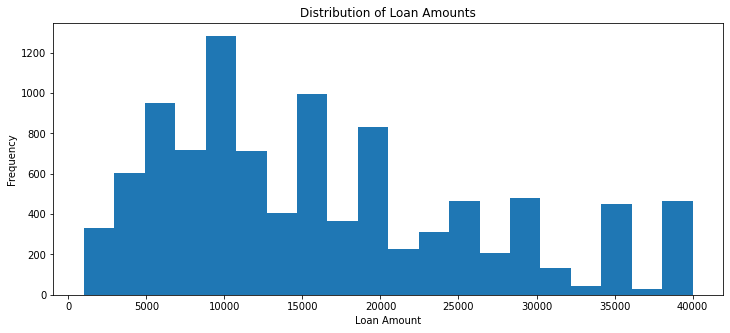

In [225]:
plt.figure(figsize = [12, 5])
df['loan_amount'].plot(kind='hist', bins=20)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

* `Histogram of the distribution of interest rate`

This visualization shows the frequency of different values of the interest rate. The histogram uses a set of bins to group the interest rates into intervals, and the height of each bar represents the frequency of loans with interest rates within that interval. We can see that the majority of loans have interest rates between 5% and 15%, with a small number of loans having interest rates above 15%. The shape of the distribution suggests that the interest rates are skewed to the left, with a longer tail of higher interest rates. This may indicate that a relatively small number of loans have significantly higher interest rates compared to the rest of the loans in the dataset.

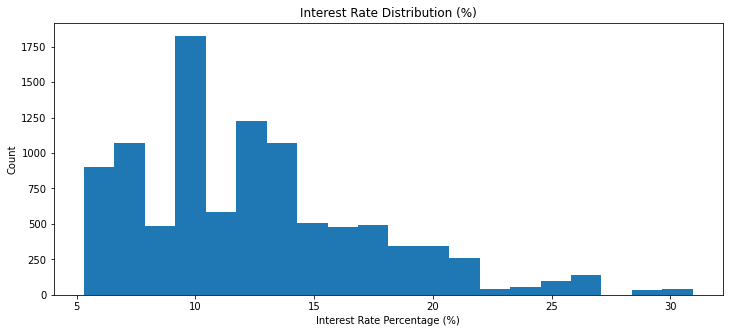

In [224]:
plt.figure(figsize = [12, 5])
df['interest_rate'].plot(kind='hist', bins=20)
plt.title('Interest Rate Distribution (%)')
plt.xlabel('Interest Rate Percentage (%)')
plt.ylabel('Count')
plt.show()

* `Boxplot of the distribution of interest rate by loan status`

The boxplot shows the distribution of interest rates for loans in different loan statuses. The boxplot uses the median, first and third quartiles, and minimum and maximum values to summarize the distribution of interest rates for each loan status. We can see that the distribution of interest rates is generally higher for loans that are in the grace period or late compared to loans that are current, fully paid, or have been charged off. This suggests that borrowers with loans in the grace period or late may be more likely to pay higher interest rates compared to borrowers with loans in other statuses. 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

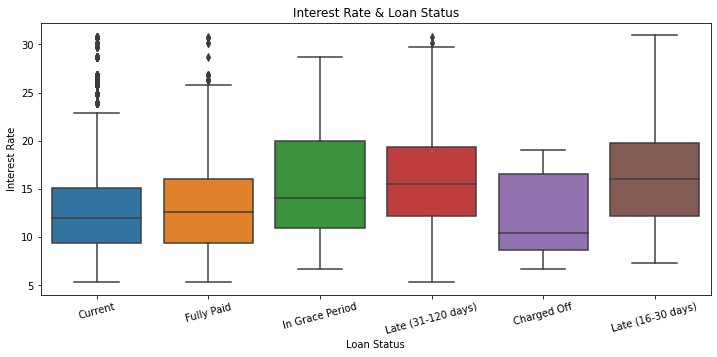

In [226]:
plt.figure(figsize = [12, 5])
sns.boxplot(data=df,y='interest_rate',x='loan_status')
plt.title('Interest Rate & Loan Status')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.xticks(rotation=15)

* `Violit plot for the relationship between interest rate and loan purpose`

The violin plot shows the relationship between interest rates and loan purposes. The plot uses a kernel density estimate to show the distribution of interest rates for each loan purpose. We can see that the distribution of interest rates is generally higher for loans with the 'small business' and'renewable energy' purposes compared to other loan purposes. We can also see that the distribution of interest rates for loans with the 'home improvement', 'major purchase', and 'other' purposes is relatively wide, indicating that there is a higher degree of variation in the interest rates for these loan purposes. This suggests that there may be other factors that are influencing the interest rates of loans with these purposes, such as the borrower's creditworthiness or the loan terms.

Text(0, 0.5, 'Interest Rate')

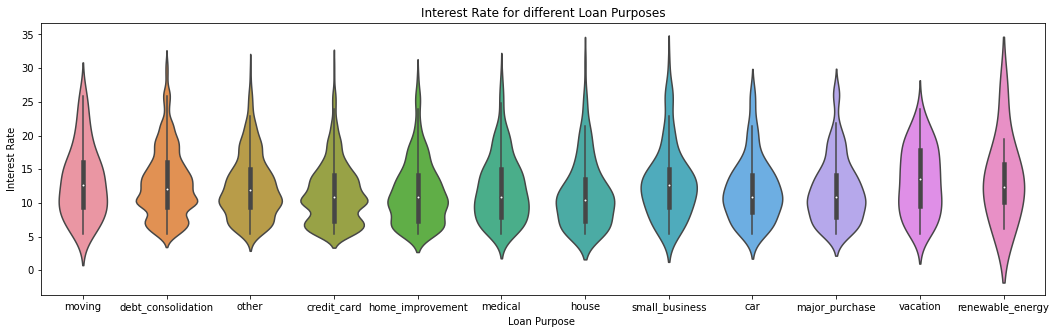

In [80]:
plt.figure(figsize = [18, 5])
sns.violinplot(data=df,x='loan_purpose', y='interest_rate')
plt.title('Interest Rate for different Loan Purposes')
plt.xlabel('Loan Purpose ')
plt.ylabel('Interest Rate')

* `Pie Chart of the proportion of loans by loan status`.

The pie chart shows the proportion of loans by loan status. We can see that the majority of loans are Current loans, followed by Fully Paid loans, and then in Grace Period loans. The pie chart reveals that only a small percentage of loans have been charged off, which suggests that the overall performance of the loans in the dataset is relatively strong. It also shows that the proportion of current loans is relatively high, which may indicate that borrowers are making timely payments on their loans.

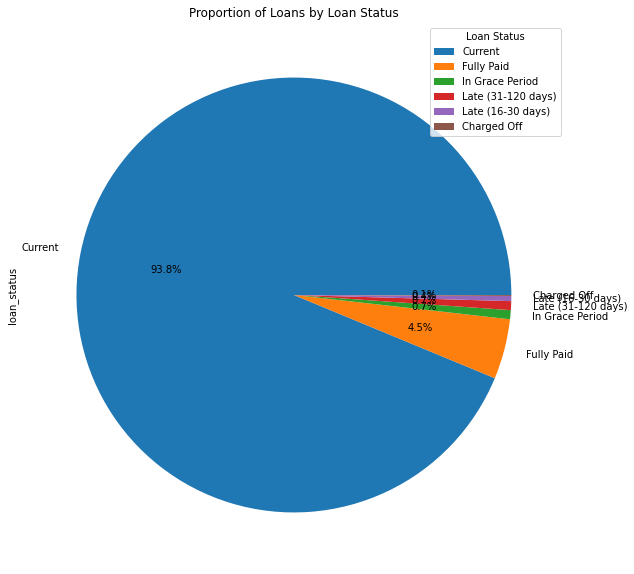

In [227]:
plt.figure(figsize = [18, 10])
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Loans by Loan Status')
plt.legend(title='Loan Status')
plt.show()

* `Countplot of Homeownership Values`

The countplot shows the frequency of loans by homeownership status for the loans. We can see that the majority of borrowers are mortgagees, followed by renters and finally homeowners. The countplot reveals that a relatively small percentage of borrowers are homeowners, which may suggest that homeownership is an important factor for borrowers in this dataset. It also shows that the proportion of renters is relatively high, which may indicate that there is a significant number of borrowers who do not own their own homes.

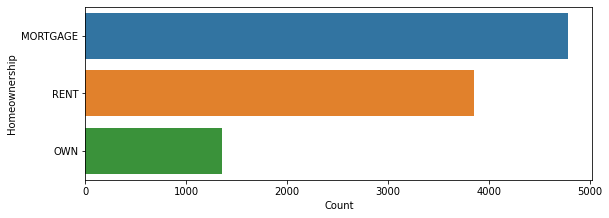

In [230]:
plt.figure(figsize=(20, 7))
homeownership = df.homeownership.unique().tolist()
plt.subplot(2, 2, 1)
sns.countplot(y='homeownership', data=df)
plt.grid(False)
plt.ylabel("Homeownership")
plt.xlabel("Count")
plt.show()

* `Scatterplot for the relationship between loan amount and loan purposes.`

The scatterplot shows the relationship between loan amounts and loan purposes. We can see that there are clusters of loans with different loan purposes, and that the loan amounts tend to vary based on the loan purpose. For example, loans with the 'home improvement' and 'major purchase' purposes tend to have higher loan amounts compared to loans with other purposes. We can also see that there is a lot of overlap in the loan amounts for different loan purposes, which suggests that the loan amount may not be the only factor influencing the loan purpose. Other factors, such as the borrower's creditworthiness or the loan terms, may also be important in determining the loan purpose.

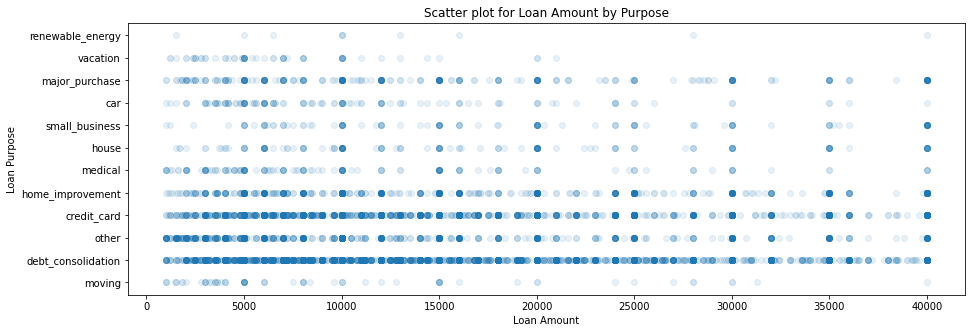

In [82]:
plt.figure(figsize = [15, 5])
plt.scatter(data = df, x = 'loan_amount', y = 'loan_purpose',  alpha =  0.1)
plt.title('Scatter plot for Loan Amount by Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')
plt.show()

# **Part B: Model Training and Predictions**

Machine Learning algorithms cannot handle categorical values directly, as they expect input data to be numeric. Therefore, we have to encode the categorical values in the dataset as numeric before applying a Machine Learning algorithm. In this way, we can include the categorical data in the models and make use of the information contained in the categorical values to make predictions or classify data. \\

We will use Ordinal Encoding. It is important to note that this encoder does not create a new column for each category. This means that it does not create new features for each category.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             10000 non-null  object 
 1   homeownership                     10000 non-null  object 
 2   annual_income                     10000 non-null  float64
 3   verified_income                   10000 non-null  object 
 4   debt_to_income                    10000 non-null  float64
 5   delinq_2y                         10000 non-null  int64  
 6   months_since_last_delinq          10000 non-null  float64
 7   earliest_credit_line              10000 non-null  int64  
 8   inquiries_last_12m                10000 non-null  int64  
 9   total_credit_lines                10000 non-null  int64  
 10  open_credit_lines                 10000 non-null  int64  
 11  total_credit_limit                10000 non-null  int64  
 12  total

## Encoding

In [84]:
cat_list = []
for col in df.columns:
  if df[col].dtypes == 'object':
    cat_list.append(col)
cat_list

['state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

* `issue_month` : We wouldn't know before whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_month. This would cause **Data Leakage**. So we are going to drop this column.

In [85]:
df.drop(columns=['issue_month'], inplace=True)

* `grade` and `sub_grade`:

`grade` is just a sub-feature of `sub_grade`. So we are goinig to drop its column.

In [86]:
df.drop(columns=['grade'], inplace=True)

* For the rest categorical variable, we will apply an encoding method.

In [87]:
cat_list_enc = ['state', 'homeownership', 'verified_income', 'loan_purpose',
                'application_type', 'loan_status', 'initial_listing_status',
                'disbursement_method', 'sub_grade']
encoder = OrdinalEncoder()
df[cat_list_enc] = df[cat_list_enc].astype(str)
encoder.fit(df[cat_list_enc])
df[cat_list_enc] = encoder.transform(df[cat_list_enc])

#### Check for duplicates columns and features


In [88]:
print(f"Dataset size: {df.shape}")

# Remove Duplicate Features
df = df.T.drop_duplicates()
df = df.T

# Remove Duplicate Rows
df.drop_duplicates(inplace=True)

print(f"Dataset size: {df.shape}")

Dataset size: (10000, 46)
Dataset size: (10000, 45)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             10000 non-null  float64
 1   homeownership                     10000 non-null  float64
 2   annual_income                     10000 non-null  float64
 3   verified_income                   10000 non-null  float64
 4   debt_to_income                    10000 non-null  float64
 5   delinq_2y                         10000 non-null  float64
 6   months_since_last_delinq          10000 non-null  float64
 7   earliest_credit_line              10000 non-null  float64
 8   inquiries_last_12m                10000 non-null  float64
 9   total_credit_lines                10000 non-null  float64
 10  open_credit_lines                 10000 non-null  float64
 11  total_credit_limit                10000 non-null  float64
 12  total

## Correlation with the Target Value

After encoding the categorical values, we will check the correlation between the variables and the target value of the dataset. It is an important step in the data exploration and preprocessing process. 

In [90]:
df.corr().abs()['interest_rate'].sort_values(ascending=False)

interest_rate                       1.000000
sub_grade                           0.992921
paid_interest                       0.514508
term                                0.358664
total_debit_limit                   0.254225
verified_income                     0.242954
disbursement_method                 0.168792
debt_to_income                      0.141393
months_since_last_delinq            0.139666
num_mort_accounts                   0.138351
inquiries_last_12m                  0.131193
total_credit_limit                  0.130497
account_never_delinq_percent        0.124702
months_since_last_credit_inquiry    0.123457
accounts_opened_24m                 0.120657
loan_status                         0.109067
earliest_credit_line                0.103635
initial_listing_status              0.100040
annual_income                       0.099584
installment                         0.098811
delinq_2y                           0.090456
num_cc_carrying_balance             0.081741
homeowners

In general, having variables that are high correlated with the target variable can be useful for building a predictive model, as they can provide strong signals about the target variable. However, it is important to consider the potential drawbacks of using such variables, as they can also introduce problems such as multicollinearity and overfitting.

Multicollinearity refers to the situation where two or more independent variables are highly correlated with each other. This can cause problems in regression models, as it can make it difficult to accurately estimate the coefficients of the independent variables.

Overfitting refers to the situation where a model performs well on the training data, but poorly on unseen data. This can happen when a model is too complex or has too many parameters, and it can lead to poor generalization performance.

We can see that `sub_grade` has **99% correlation** with the target variable `interest_rate`. Drop this column. 

In [91]:
df.drop(columns=['sub_grade'], inplace=True)

So for the training, we have **44** features.

In [92]:
df.shape

(10000, 44)

## Baseline Training

In [97]:
def training(MODEL, X, y, SCALER):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  if SCALER == 'True':
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

  model = MODEL
  start_time = datetime.datetime.now()
  model.fit(X_train, y_train)
  end_time = datetime.datetime.now()
  elapsed_time = end_time - start_time
  print('Training time:', str(elapsed_time))
  predict = model.predict(X_test)
  print("\nMean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
  print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
  print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')

  start_time = datetime.datetime.now()
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=5)))
  end_time = datetime.datetime.now()
  elapsed_time = end_time - start_time
  print('\nCross Validation time:', str(elapsed_time))

  errors = abs(predict - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  print('Accuracy               :', round(accuracy,3), '%.') 
  
  return 

In [98]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

baseline_models = [LinearRegression(), Lasso(), RandomForestRegressor(), DecisionTreeRegressor(), SVR()]
for model in baseline_models: 
  print('Model: ', str(model))
  training(model, X, y, SCALER=False)
  print('\n################################\n')

Model:  LinearRegression()
Training time: 0:00:00.013319

Mean Absolute Error    : 2.134
Mean Squared Error     : 7.426
(R^2) Score            : 71.99 %.
Train Score            : 69.39 %.
Test Score             : 71.99 %.
Cross Val Score        : 69.484 %, deviation: 0.01558325312882801

Cross Validation time: 0:00:00.236176
Accuracy               : 80.769 %.

################################

Model:  Lasso()
Training time: 0:00:00.406930

Mean Absolute Error    : 2.3
Mean Squared Error     : 8.587
(R^2) Score            : 67.61 %.
Train Score            : 64.445 %.
Test Score             : 67.61 %.
Cross Val Score        : 64.855 %, deviation: 0.02126001326258621

Cross Validation time: 0:00:02.918784
Accuracy               : 78.919 %.

################################

Model:  RandomForestRegressor()
Training time: 0:00:12.054457

Mean Absolute Error    : 0.705
Mean Squared Error     : 1.911
(R^2) Score            : 92.792 %.
Train Score            : 98.85 %.
Test Score             :

| Regressor         | Accuracy | MAE |
|-------------------|----------|-----|
| Linear Regression | 80.769 % | 2.134 |
| Lasso Regression  | 78.919 % | 2.3 |
| Random Forest Regression | 93.911 % | 0.705 | 
| Decision Tree Regression | 90.824 % | 1.095 |
| Support Vector Machine Regressor | 68.719 % | 3.623 |




Results: 

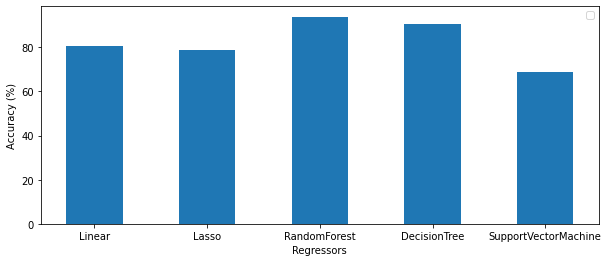

In [99]:
regressors = ['Linear', 'Lasso', 'RandomForest', 'DecisionTree', 'SupportVectorMachine']
accuracy = [80.769, 78.919, 93.906, 90.724, 68.719]

fig = plt.figure(figsize = (10, 4))  
X_axis = np.arange(len(regressors))
plt.bar(X_axis, accuracy, 0.5)
plt.xticks(X_axis, regressors)
plt.xlabel("Regressors")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

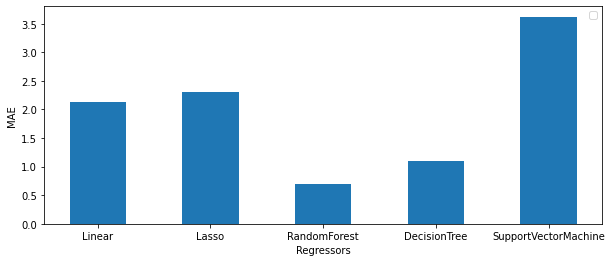

In [100]:
regressors = ['Linear', 'Lasso', 'RandomForest', 'DecisionTree', 'SupportVectorMachine']
mae = [2.134, 2.3, 0.705, 1.091, 3.623 ]

fig = plt.figure(figsize = (10, 4))  
X_axis = np.arange(len(regressors))
plt.bar(X_axis, mae, 0.5)
plt.xticks(X_axis, regressors)
plt.xlabel("Regressors")
plt.ylabel("MAE")
plt.legend()
plt.show()

## Hyperparameter Tuning

* Check for Scalling Method : 

In [101]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

baseline_models = [LinearRegression(), Lasso(), RandomForestRegressor(), DecisionTreeRegressor(), SVR()]
for model in baseline_models: 
  print('Model: ', str(model))
  training(model, X, y, SCALER=True)
  print('\n################################\n')

Model:  LinearRegression()
Training time: 0:00:00.025602

Mean Absolute Error    : 2.134
Mean Squared Error     : 7.426
(R^2) Score            : 71.99 %.
Train Score            : 69.39 %.
Test Score             : 71.99 %.
Cross Val Score        : 69.484 %, deviation: 0.01558325312882801

Cross Validation time: 0:00:00.414637
Accuracy               : 80.769 %.

################################

Model:  Lasso()
Training time: 0:00:00.398501

Mean Absolute Error    : 2.3
Mean Squared Error     : 8.587
(R^2) Score            : 67.61 %.
Train Score            : 64.445 %.
Test Score             : 67.61 %.
Cross Val Score        : 64.855 %, deviation: 0.02126001326258621

Cross Validation time: 0:00:02.842609
Accuracy               : 78.919 %.

################################

Model:  RandomForestRegressor()
Training time: 0:00:13.054389

Mean Absolute Error    : 0.709
Mean Squared Error     : 1.898
(R^2) Score            : 92.842 %.
Train Score            : 98.887 %.
Test Score             

After Scalling we have: 

| Regressor | Accuracy | MAE | 
|-----------|----------|-----| 
| Linear Regression | 80.769 % | 2.134 |
| Lasso Regression  | 78.919 % | 2.3 |
| Random Forest Regression | 93.848 % | 0.709 |
| Decision Tree Regression | 91.026 % | 1.066 |
| Support Vector Machine Regressor | 68.719 % | 3.623 |

Results: 

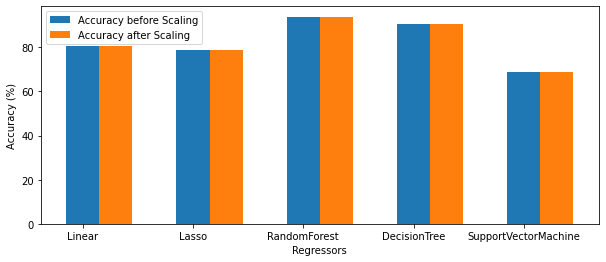

In [102]:
regressors = ['Linear', 'Lasso', 'RandomForest', 'DecisionTree', 'SupportVectorMachine']
accuracy_before = [80.769, 78.919, 93.906, 90.724, 68.719]
accuracy_after = [80.769, 78.919, 93.745, 90.778, 68.719]

fig = plt.figure(figsize = (10, 4))  
X_axis = np.arange(len(regressors))

plt.bar(X_axis, accuracy_before, 0.3, label = "Accuracy before Scaling")
plt.bar(X_axis + 0.3, accuracy_after, 0.3, label = "Accuracy after Scaling")

plt.xticks(X_axis, regressors)
plt.xlabel("Regressors")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

Accuracies are the same, so it is no need to use Scaling.

* Tuning hyperparameters of `LinearRegression()`

In [103]:
n_components = [5, 10, 15, 20, 25, 30, 35, 38, 40, 42, 43]

eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

accuracy_calc = 0 
error_calc = 100
for component in n_components:
  print('N_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = LinearRegression()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  
  mae = mean_absolute_error(y_test, predict)
  print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
  print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
  print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  errors = abs(predict - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  print('Accuracy               :', round(accuracy,3), '%.') 
  print('##########################################')

  if accuracy > accuracy_calc and mae < error_calc: 
    accuracy_calc = accuracy
    mae = error_calc
    count = component

print('Higher Accuracy & Smaller Error ---> n_components=', count)

N_COMPONENTS =  5
Mean Absolute Error    : 3.792
Mean Squared Error     : 23.092
(R^2) Score            : 12.902 %.
Train Score            : 10.536 %.
Test Score             : 12.902 %.
Cross Val Score        : 69.484 %, deviation: 0.01558325312882801
Accuracy               : 64.699 %.
##########################################
N_COMPONENTS =  10
Mean Absolute Error    : 2.753
Mean Squared Error     : 12.458
(R^2) Score            : 53.011 %.
Train Score            : 49.563 %.
Test Score             : 53.011 %.
Cross Val Score        : 69.484 %, deviation: 0.01558325312882801
Accuracy               : 74.757 %.
##########################################
N_COMPONENTS =  15
Mean Absolute Error    : 2.714
Mean Squared Error     : 12.178
(R^2) Score            : 54.069 %.
Train Score            : 51.055 %.
Test Score             : 54.069 %.
Cross Val Score        : 69.484 %, deviation: 0.01558325312882801
Accuracy               : 75.337 %.
##########################################
N_COMPON

We will use `PCA(n_components=40)`

In [104]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

param_grid = {'fit_intercept': [True, False]}
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=4)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'fit_intercept': True}


`fit_intercept = True` is the default value, so we keep this model as it is. 

In [106]:
model = LinearRegression()
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('Training time:', str(elapsed_time))
predict = model.predict(X_test)
print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
start_time = datetime.datetime.now()
print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=5)))
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('\nCross Validation time:', str(elapsed_time))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy               :', round(accuracy,3), '%.') 

Training time: 0:00:00.018822
Mean Absolute Error    : 2.133
Mean Squared Error     : 7.416
(R^2) Score            : 72.027 %.
Train Score            : 69.381 %.
Test Score             : 72.027 %.
Cross Val Score        : 69.484 %, deviation: 0.01558325312882801

Cross Validation time: 0:00:00.436975
Accuracy               : 80.783 %.


`Accuray before: 80.769 %` \\

`Accuracy now: 80.783 %`

* Tuning hyperparameters of `Lasso()`

In [107]:
n_components = [5, 10, 15, 20, 25, 30, 35, 38, 40, 42, 43]

eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

accuracy_calc = 0 
error_calc = 100
for component in n_components:
  print('N_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = Lasso()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  
  mae = mean_absolute_error(y_test, predict)
  print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
  print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
  print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  errors = abs(predict - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  print('Accuracy               :', round(accuracy,3), '%.') 
  print('##########################################')
  if accuracy > accuracy_calc and mae < error_calc: 
    accuracy_calc = accuracy
    mae = error_calc
    count = component
  
print('Higher Accuracy & Smaller Error ---> n_components=', count)


N_COMPONENTS =  5
Mean Absolute Error    : 3.792
Mean Squared Error     : 23.092
(R^2) Score            : 12.902 %.
Train Score            : 10.536 %.
Test Score             : 12.902 %.
Cross Val Score        : 64.855 %, deviation: 0.02126001326258621
Accuracy               : 64.699 %.
##########################################
N_COMPONENTS =  10
Mean Absolute Error    : 2.753
Mean Squared Error     : 12.459
(R^2) Score            : 53.008 %.
Train Score            : 49.562 %.
Test Score             : 53.008 %.
Cross Val Score        : 64.855 %, deviation: 0.02126001326258621
Accuracy               : 74.759 %.
##########################################
N_COMPONENTS =  15
Mean Absolute Error    : 2.719
Mean Squared Error     : 12.199
(R^2) Score            : 53.987 %.
Train Score            : 50.977 %.
Test Score             : 53.987 %.
Cross Val Score        : 64.855 %, deviation: 0.02126001326258621
Accuracy               : 75.252 %.
##########################################
N_COMPON

We will use `PCA(n_components=35)`

In [108]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=35)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
              'fit_intercept': [True, False],
              'max_iter': [2, 5, 10, 100],
              'tol': [1e-4, 1e-6, 1e-8],
              'normalize': [True, False]}

model = Lasso()
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'tol': 1e-08}


`alpha = 0.01`, `fit_intercept = True`, `max_iter = 100`, `normalize = False`, `tol = 1e-08`

In [109]:
model = Lasso(alpha=0.01, fit_intercept=True, max_iter=100, normalize=False, tol=1e-08)
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('Training time:', str(elapsed_time))
predict = model.predict(X_test)
print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
start_time = datetime.datetime.now()
print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('\nCross Validation time:', str(elapsed_time))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy               :', round(accuracy,3), '%.') 

Training time: 0:00:00.005540
Mean Absolute Error    : 2.15
Mean Squared Error     : 7.568
(R^2) Score            : 71.456 %.
Train Score            : 68.943 %.
Test Score             : 71.456 %.
Cross Val Score        : 69.309 %, deviation: 0.010150332848360682

Cross Validation time: 0:00:00.337345
Accuracy               : 80.518 %.


`Accuray before: 78.919 %` \\

`Accuracy now: 80.518 %`

* Tuning hyperparameters of `RandomForestRegressor()`

In [119]:
n_components = [5, 10, 15, 20, 25, 30, 35, 38, 40, 42, 43]

eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

accuracy_calc = 0 
error_calc = 100
for component in n_components:
  print('N_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  
  mae = mean_absolute_error(y_test, predict)
  print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
  print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
  print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  errors = abs(predict - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  print('Accuracy               :', round(accuracy,3), '%.') 
  print('##########################################')
  if accuracy > accuracy_calc and mae < error_calc: 
    accuracy_calc = accuracy
    mae = error_calc
    count = component
  
print('Higher Accuracy & Smaller Error ---> n_components=', count)


N_COMPONENTS =  5
Mean Absolute Error    : 3.705
Mean Squared Error     : 22.475
(R^2) Score            : 15.229 %.
Train Score            : 87.718 %.
Test Score             : 15.229 %.
Cross Val Score        : 91.965 %, deviation: 0.008930726581727296
Accuracy               : 65.996 %.
##########################################
N_COMPONENTS =  10
Mean Absolute Error    : 1.151
Mean Squared Error     : 3.189
(R^2) Score            : 87.97 %.
Train Score            : 98.116 %.
Test Score             : 87.97 %.
Cross Val Score        : 91.916 %, deviation: 0.008206491485102883
Accuracy               : 89.723 %.
##########################################
N_COMPONENTS =  15
Mean Absolute Error    : 1.227
Mean Squared Error     : 3.475
(R^2) Score            : 86.895 %.
Train Score            : 97.982 %.
Test Score             : 86.895 %.
Cross Val Score        : 91.981 %, deviation: 0.008311862718674068
Accuracy               : 88.991 %.
##########################################
N_COMPONE

We will use `PCA(n_components=10)`

In [127]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

param_grid = {
    'n_estimators': [20, 50, 80, 100], 
    'max_depth': [5, 10, 15, 20, 25], 
    'min_samples_split': [1, 2, 5], 
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


When trying to perform `GridSearchCV()` with the different hyperparameters, the training process took a lot of time to search all the possible combinations. For this reason, I chose to perform `GridSearchCV()` for every parameter separately and then combine the best from each one. 

`bootstrap=True`, `max_depth=20`, `min_samples_leaf=2`, `min_samples_split=5`, `n_estimators=100`

In [130]:
model = RandomForestRegressor(bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('Training time:', str(elapsed_time))
predict = model.predict(X_test)
print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
start_time = datetime.datetime.now()
print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('\nCross Validation time:', str(elapsed_time))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy               :', round(accuracy,3), '%.') 

Training time: 0:00:07.317462
Mean Absolute Error    : 1.154
Mean Squared Error     : 3.249
(R^2) Score            : 87.747 %.
Train Score            : 96.841 %.
Test Score             : 87.747 %.
Cross Val Score        : 91.811 %, deviation: 0.008569592522157879

Cross Validation time: 0:00:53.950323
Accuracy               : 89.692 %.


`Accuray before: 93.9119 %` \\

`Accuracy now: 89.692 %`

* Tuning hyperparameters of `DecisionTreeRegressor()`

In [110]:
n_components = [5, 10, 15, 20, 25, 30, 35, 38, 40, 42, 43]

eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

accuracy_calc = 0 
error_calc = 100
for component in n_components:
  print('N_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = DecisionTreeRegressor()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  
  mae = mean_absolute_error(y_test, predict)
  print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
  print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
  print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  errors = abs(predict - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  print('Accuracy               :', round(accuracy,3), '%.') 
  print('##########################################')
  if accuracy > accuracy_calc and mae < error_calc: 
    accuracy_calc = accuracy
    mae = error_calc
    count = component
  
print('Higher Accuracy & Smaller Error ---> n_components=', count)

N_COMPONENTS =  5
Mean Absolute Error    : 4.819
Mean Squared Error     : 40.641
(R^2) Score            : -53.289 %.
Train Score            : 100.0 %.
Test Score             : -53.289 %.
Cross Val Score        : 81.509 %, deviation: 0.018287414799828806
Accuracy               : 57.573 %.
##########################################
N_COMPONENTS =  10
Mean Absolute Error    : 1.725
Mean Squared Error     : 7.396
(R^2) Score            : 72.105 %.
Train Score            : 100.0 %.
Test Score             : 72.105 %.
Cross Val Score        : 82.001 %, deviation: 0.009096571358339947
Accuracy               : 84.97 %.
##########################################
N_COMPONENTS =  15
Mean Absolute Error    : 1.815
Mean Squared Error     : 7.687
(R^2) Score            : 71.006 %.
Train Score            : 100.0 %.
Test Score             : 71.006 %.
Cross Val Score        : 81.234 %, deviation: 0.005187881030724277
Accuracy               : 84.263 %.
##########################################
N_COMPONE

We will use `PCA(n_components=10)`

In [117]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

param_grid = {
    'max_depth': [1, 2, 5, 10, 12],
    'max_leaf_nodes': [5, 10, 20, 40],
    'min_samples_leaf': [1, 3, 5, 8, 10, 12],
    'min_weight_fraction_leaf': [0.01, 0.05, 0.1, 0.2, 0.5],
    'splitter':["best", "random"],
}

model = DecisionTreeRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
{'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.01, 'splitter': 'best'}


`max_depth=10`, `max_leaf_nodes=40`, `min_samples_leaf=1`, `min_weight_fraction_leaf=0.01`, `splitter='best'`

In [118]:
model = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.011, splitter='best')
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('Training time:', str(elapsed_time))
predict = model.predict(X_test)
print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
start_time = datetime.datetime.now()
print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('\nCross Validation time:', str(elapsed_time))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy               :', round(accuracy,3), '%.') 

Training time: 0:00:00.056359
Mean Absolute Error    : 2.16
Mean Squared Error     : 8.567
(R^2) Score            : 67.687 %.
Train Score            : 69.711 %.
Test Score             : 67.687 %.
Cross Val Score        : 67.621 %, deviation: 0.009345540891748983

Cross Validation time: 0:00:00.524211
Accuracy               : 80.54 %.


`Accuray before: 90.824  %` \\

`Accuracy now: 80.54 %`

* Tuning hyperparameters of `SVR()`

In [131]:
n_components = [5, 10, 15, 20, 25, 30, 35, 38, 40, 42, 43]

eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

accuracy_calc = 0 
error_calc = 100
for component in n_components:
  print('N_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = SVR()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  
  mae = mean_absolute_error(y_test, predict)
  print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
  print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
  print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  errors = abs(predict - y_test)
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  print('Accuracy               :', round(accuracy,3), '%.') 
  print('##########################################')
  if accuracy > accuracy_calc and mae < error_calc: 
    accuracy_calc = accuracy
    mae = error_calc
    count = component
  
print('Higher Accuracy & Smaller Error ---> n_components=', count)

N_COMPONENTS =  5
Mean Absolute Error    : 3.603
Mean Squared Error     : 22.288
(R^2) Score            : 15.933 %.
Train Score            : 13.716 %.
Test Score             : 15.933 %.
Cross Val Score        : 12.813 %, deviation: 0.009314301076498816
Accuracy               : 68.983 %.
##########################################
N_COMPONENTS =  10
Mean Absolute Error    : 3.59
Mean Squared Error     : 22.156
(R^2) Score            : 16.433 %.
Train Score            : 14.257 %.
Test Score             : 16.433 %.
Cross Val Score        : 12.813 %, deviation: 0.009314301076498816
Accuracy               : 69.117 %.
##########################################
N_COMPONENTS =  15
Mean Absolute Error    : 3.59
Mean Squared Error     : 22.156
(R^2) Score            : 16.433 %.
Train Score            : 14.257 %.
Test Score             : 16.433 %.
Cross Val Score        : 12.813 %, deviation: 0.009314301076498816
Accuracy               : 69.117 %.
##########################################
N_COMPO

PCA did not help that much, but we will use `PCA(n_components=38)`

In [142]:
eval_df = df.copy()
y = eval_df['interest_rate']
eval_df.drop(columns=['interest_rate'], inplace=True)
X = eval_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=38)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9], 
    'degree': [2,3,4]
}

model = SVR()
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'C': 100, 'degree': 2, 'epsilon': 0.7}


As in `RandomForestRegressor()` hyperparameter tuning, when trying to perform `GridSearchCV()` with the different hyperparameters, the training process took a lot of time to search all the possible combinations. For this reason, I chose to perform `GridSearchCV()` for every parameter separately and then combine the best from each one. 

`C=100`, `epsilon=0.7`, `kernel=000`, `degree=000`

In [143]:
model = SVR(C=100, epsilon=0.7, degree=2)
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('Training time:', str(elapsed_time))
predict = model.predict(X_test)
print("Mean Absolute Error    :", round(mean_absolute_error(y_test, predict), 3))
print("Mean Squared Error     :", round(mean_squared_error(y_test, predict), 3))
print("(R^2) Score            :", round(r2_score(y_test, predict) * 100, 3), '%.')

print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
start_time = datetime.datetime.now()
print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print('\nCross Validation time:', str(elapsed_time))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy               :', round(accuracy,3), '%.') 

Training time: 0:00:08.220639
Mean Absolute Error    : 3.02
Mean Squared Error     : 16.026
(R^2) Score            : 39.553 %.
Train Score            : 40.695 %.
Test Score             : 39.553 %.
Cross Val Score        : 29.988 %, deviation: 0.016154929487539358

Cross Validation time: 0:00:40.238827
Accuracy               : 73.878 %.


`Accuray before: 68.719  %` \\

`Accuracy now: 73.878 %`

After tuning the hyperparameters of each one of the above-mentioned models, we came up with the following results: 

| Regressor | Accuracy | MAE | 
|-----------|----------|-----| 
| Linear Regression | 80.783 % | 2.133 |
| Lasso Regression  | 80.518 % | 2.15 |
| Random Forest Regression | 89.692 % | 1.154 |
| Decision Tree Regression | 80.54 % | 2.16 |
| Support Vector Machine Regressor | 73.878 % | 3.02 |

| Regressor | Accuracy | MAE | 
|-----------|----------|-----| 
| Linear Regression | 80.769 % | 2.134 |
| Lasso Regression  | 78.919 % | 2.3 |
| Random Forest Regression | 93.848 % | 0.709 |
| Decision Tree Regression | 91.026 % | 1.066 |
| Support Vector Machine Regressor | 68.719 % | 3.623 |

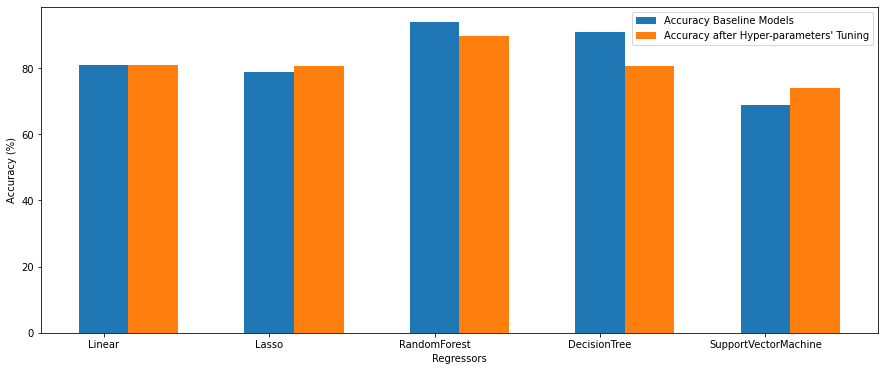

In [146]:
regressors = ['Linear', 'Lasso', 'RandomForest', 'DecisionTree', 'SupportVectorMachine']
accuracy_before = [80.769, 78.919, 93.848, 91.026, 68.719]
accuracy_after = [80.783, 80.518, 89.692, 80.54, 73.878]

fig = plt.figure(figsize = (15, 6))  
X_axis = np.arange(len(regressors))

plt.bar(X_axis, accuracy_before, 0.3, label = "Accuracy Baseline Models")
plt.bar(X_axis + 0.3, accuracy_after, 0.3, label = "Accuracy after Hyper-parameters' Tuning")

plt.xticks(X_axis, regressors)
plt.xlabel("Regressors")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

As wee see from the plot, after hyper-parameters' Tuning some of the above models have better and some worse accuracy than their baseline version. 

* `LinearRegression()` has almost the same accuracy. 
* `Lasso()` and `SVR()` have slightly better accuracy with the tuning of the possible hyper-parameters.
* `RandomForestRegressor()` and `DecisionTreeRegressor()` had better performance on its first baseline version. 


\\
Due to **lack of time**, the `GridSearchCV()` of the hyper-parameters was limited to a small range of possible values. With much more time given, it could be possible to try different values in order to find the best combination of hyper-parameters for each model. 